In [1]:
import geopandas as gp

In [2]:
seoul = gp.GeoDataFrame.from_file('seoul1\seoul1.shp')

In [3]:
import glob
import pandas as pd
path = r"1\20180423"
allFiles = glob.glob(path+"\*.DAT")
list=[]
for filename in allFiles:
    df = pd.read_csv(filename, header = None)
    list.append(df)
a = pd.concat(list)

In [4]:
a = a.iloc[:,[0,1,2,4,8]]

In [5]:
a = a.rename(columns = {0:'id', 1:'longtitude', 2:'latitude', 4:'timestamp', 8:'assigned'})

In [6]:
a = a.sort_values(['id', 'timestamp']).reset_index(drop=True)
a2 = pd.DataFrame(a.shift(periods=-1, axis=0))
a3 = a.merge(a2, left_index=True, right_index=True, suffixes=('_prev', '_curr'))

In [7]:
a5 = a3[((a3['assigned_prev'] == 0) & (a3['assigned_curr'] == 1)) | ((a3['assigned_prev'] == 1) & (a3['assigned_curr'] == 0))]

In [8]:
a6 = a5[['id_curr','longtitude_curr','latitude_curr','timestamp_curr','assigned_curr']]

In [9]:
a6 = a6.rename(columns = {'id_curr':'id', 'longtitude_curr':'longitude', 'latitude_curr':'latitude', 'timestamp_curr':'timestamp', 'assigned_curr':'assigned'})

In [10]:
a7 = pd.DataFrame(a6.shift(periods=-1, axis=0))
a8 = a6.merge(a7, left_index=True, right_index=True, suffixes=('_on', '_off'))

In [11]:
a8 = a8[(a8['id_on'] == a8['id_off'])]

In [12]:
a8 = a8[(a8['assigned_on'] == 1) & (a8['assigned_off'] == 0)]

In [13]:
b = a8.loc[:,['longitude_on','latitude_on','longitude_off','latitude_off']]

In [14]:
b['latitude_on'] = b['latitude_on']/10000000
b['longitude_on'] = b['longitude_on']/10000000
b['latitude_off'] = b['latitude_off']/10000000
b['longitude_off'] = b['longitude_off']/10000000
b = b[(b['latitude_on']>30) & (b['longitude_on']>120)]
b = b[(b['latitude_off']>30) & (b['longitude_off']>120)]

In [15]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [23]:
def plot_map(seoul,title, x_lim = None,y_lim = None,figsize = (15,10)):
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for i in range(25):
        x = seoul.iloc[i,7]
        y = seoul.iloc[i,8]
        ax.plot(x, y)
        x0 = np.mean(x)
        y0 = np.mean(y)
        plt.text(x0, y0, seoul.iloc[i,9], fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [17]:
%matplotlib inline

In [18]:
shp_path = 'seoul1\seoul1.shp'
sf = shp.Reader(shp_path)

In [19]:
list=[]
for shape in sf.shapes():
    x = [i[0] for i in shape.points]
    y = [i[1] for i in shape.points]
    list.append([x,y])

In [20]:
df1 = pd.DataFrame(list)

In [21]:
seoul['x']=df1[0]
seoul['y']=df1[1]

In [25]:
len(b)

35818

C:\Users\Wintech\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Wintech\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x720 with 0 Axes>

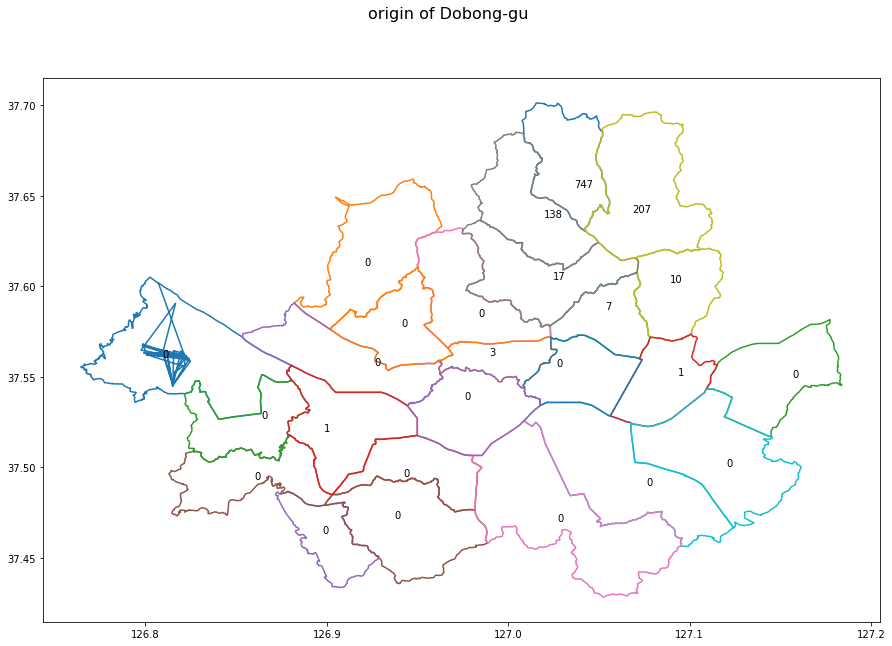

<Figure size 1080x720 with 0 Axes>

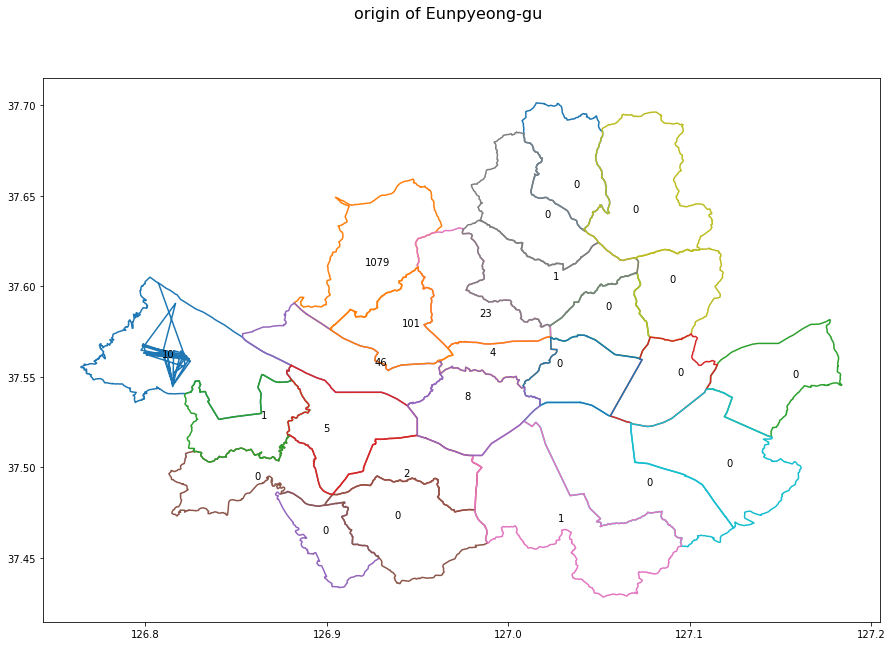

<Figure size 1080x720 with 0 Axes>

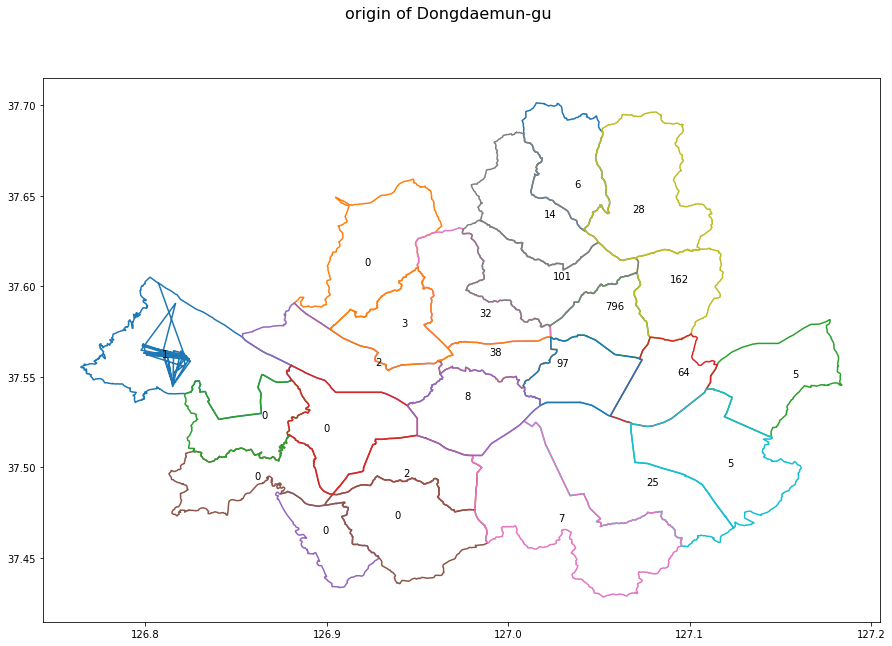

<Figure size 1080x720 with 0 Axes>

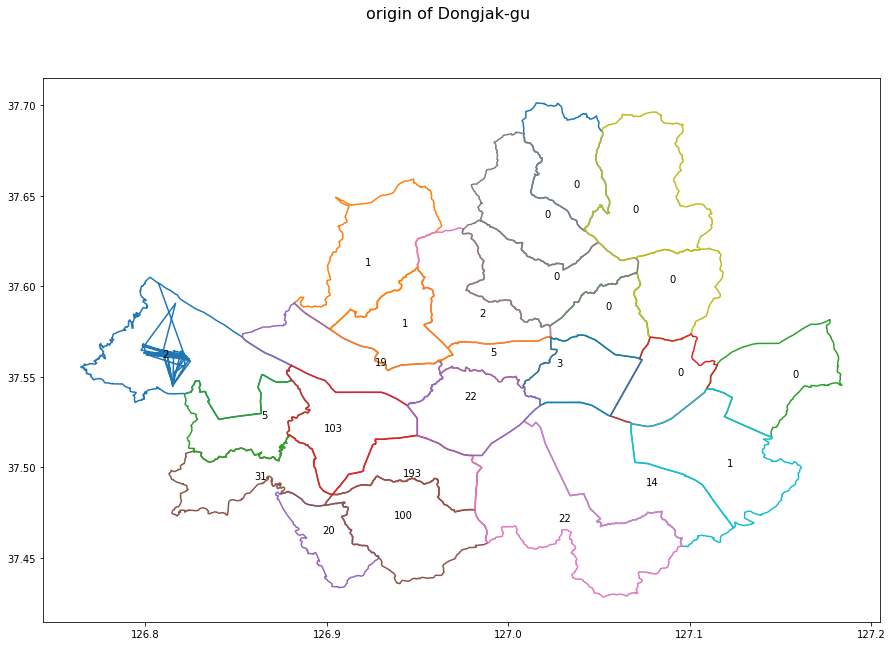

<Figure size 1080x720 with 0 Axes>

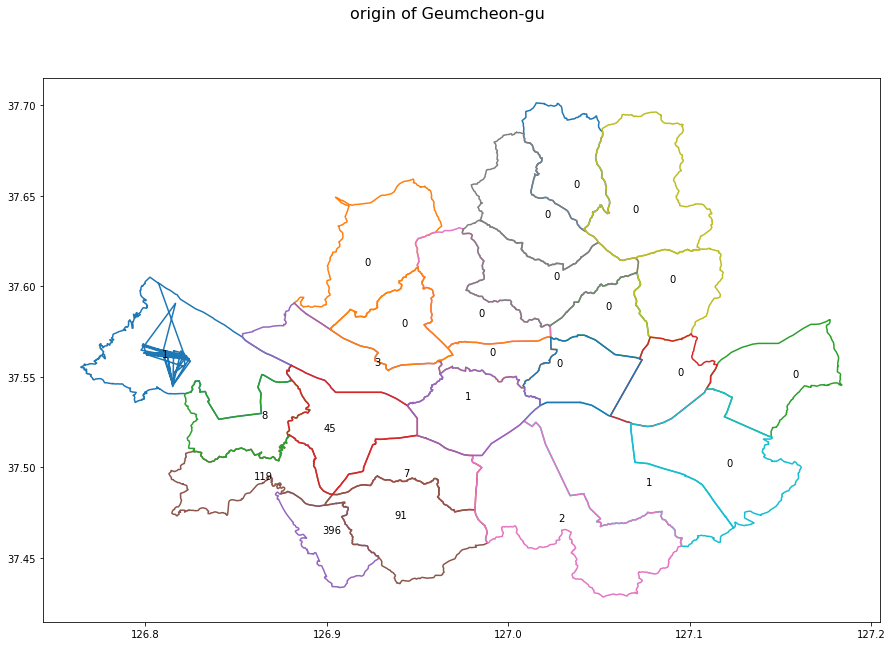

<Figure size 1080x720 with 0 Axes>

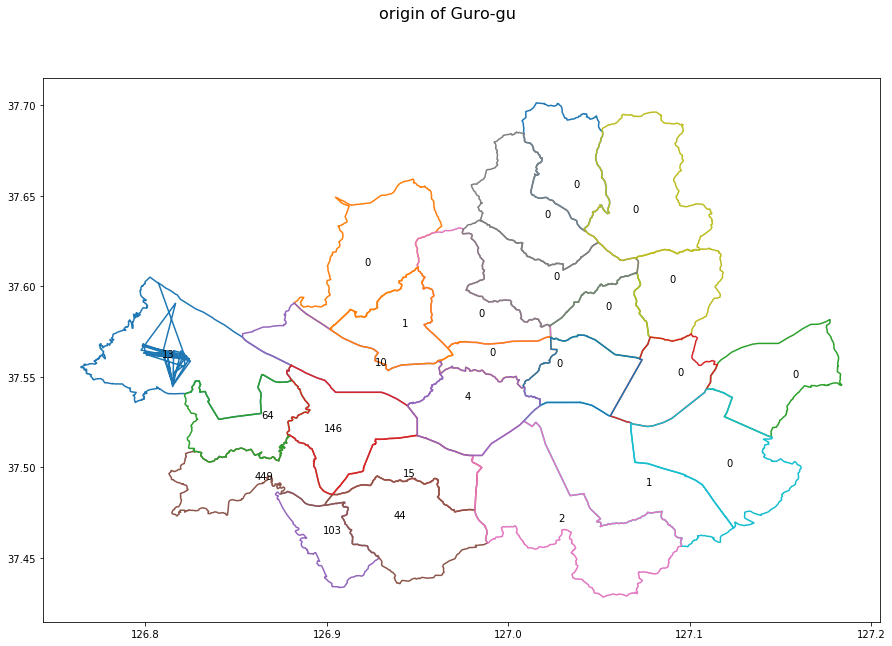

<Figure size 1080x720 with 0 Axes>

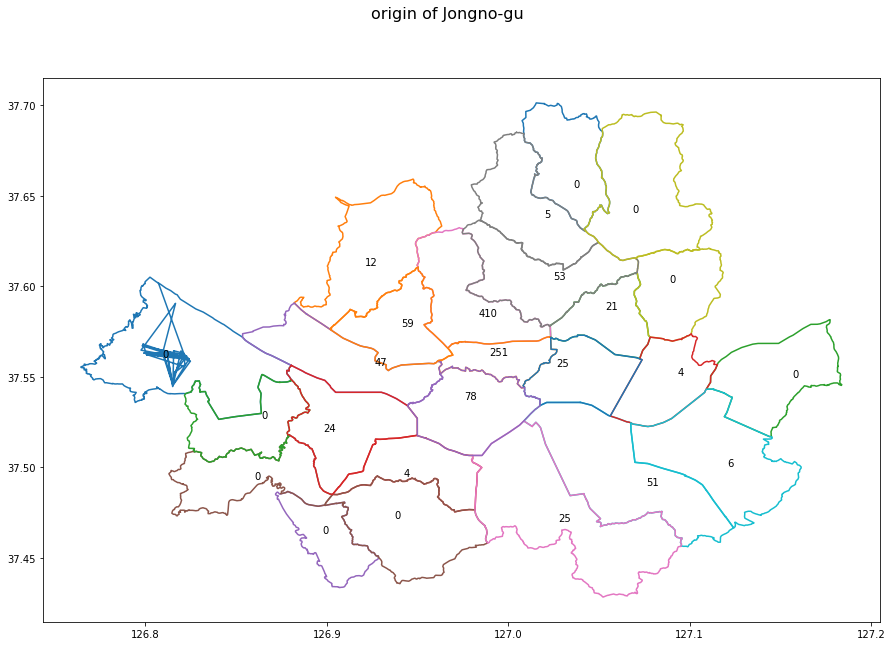

<Figure size 1080x720 with 0 Axes>

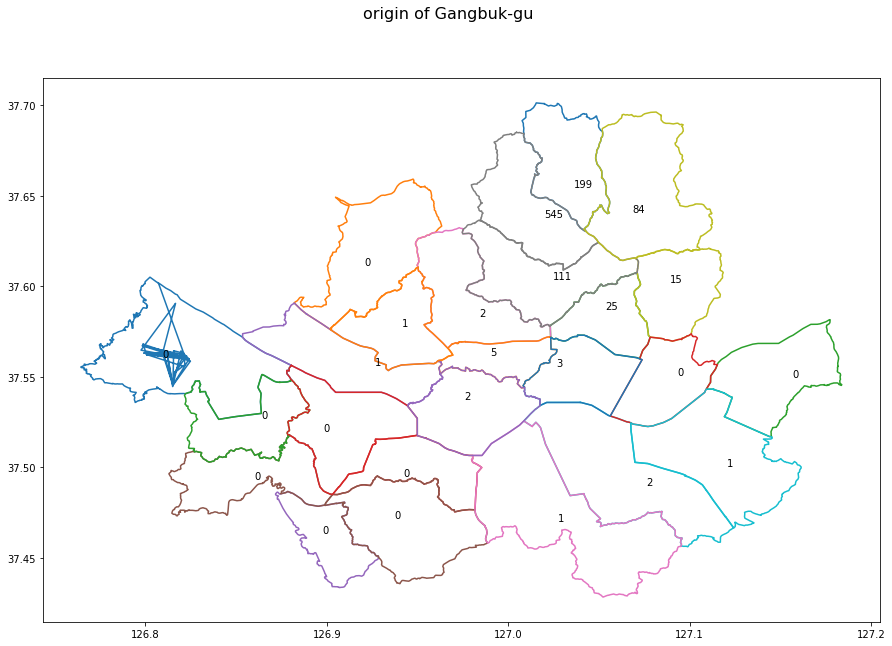

<Figure size 1080x720 with 0 Axes>

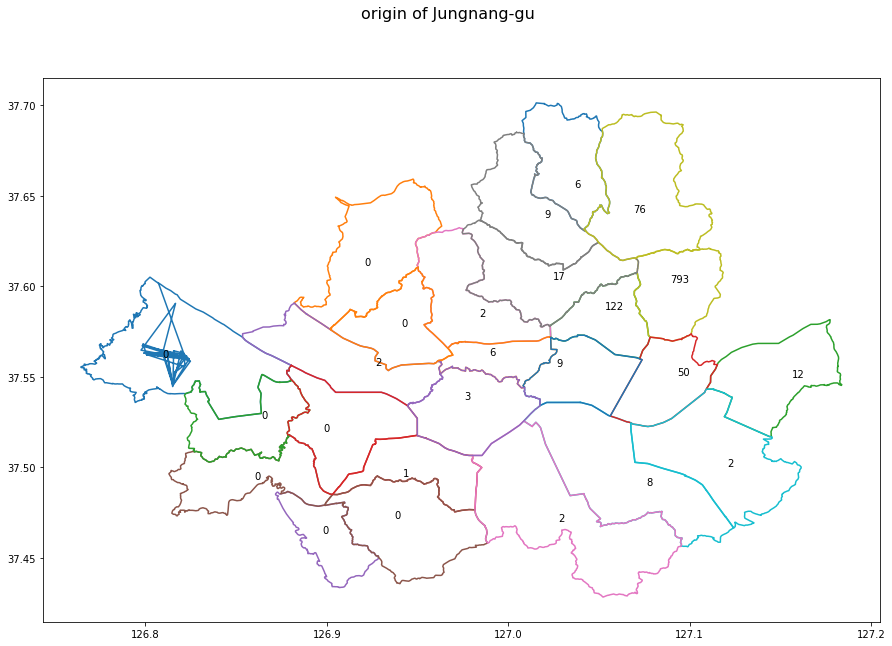

<Figure size 1080x720 with 0 Axes>

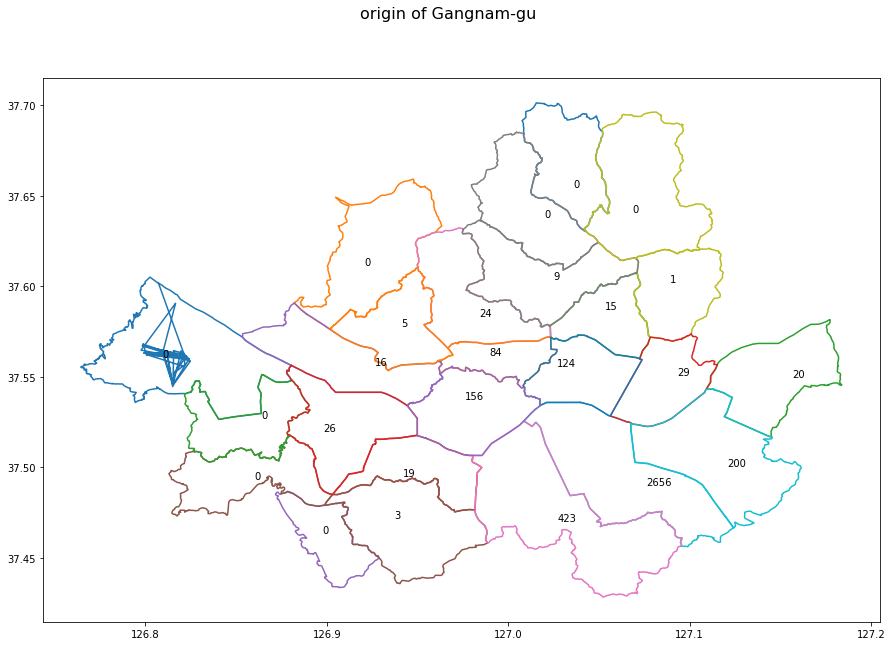

<Figure size 1080x720 with 0 Axes>

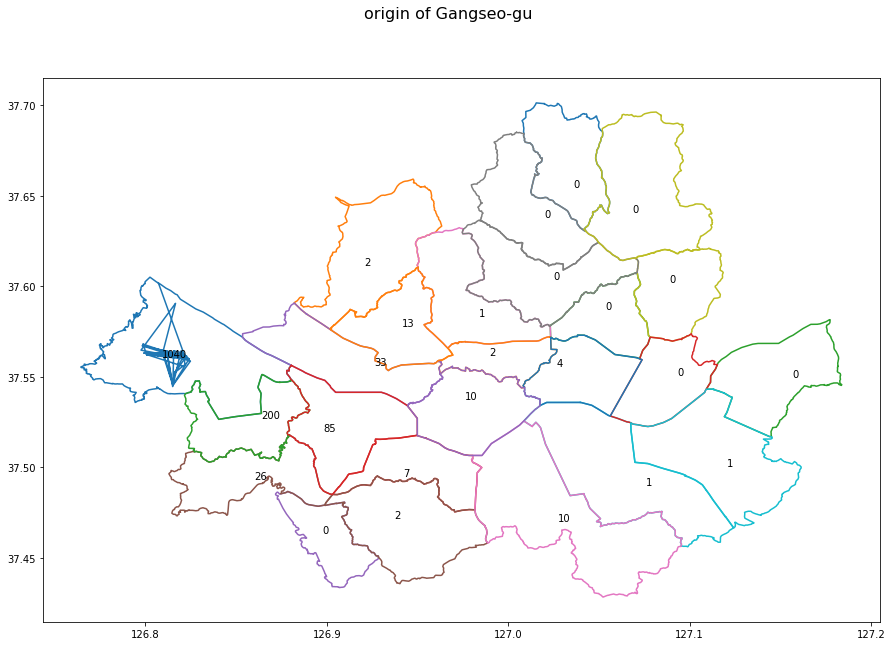

<Figure size 1080x720 with 0 Axes>

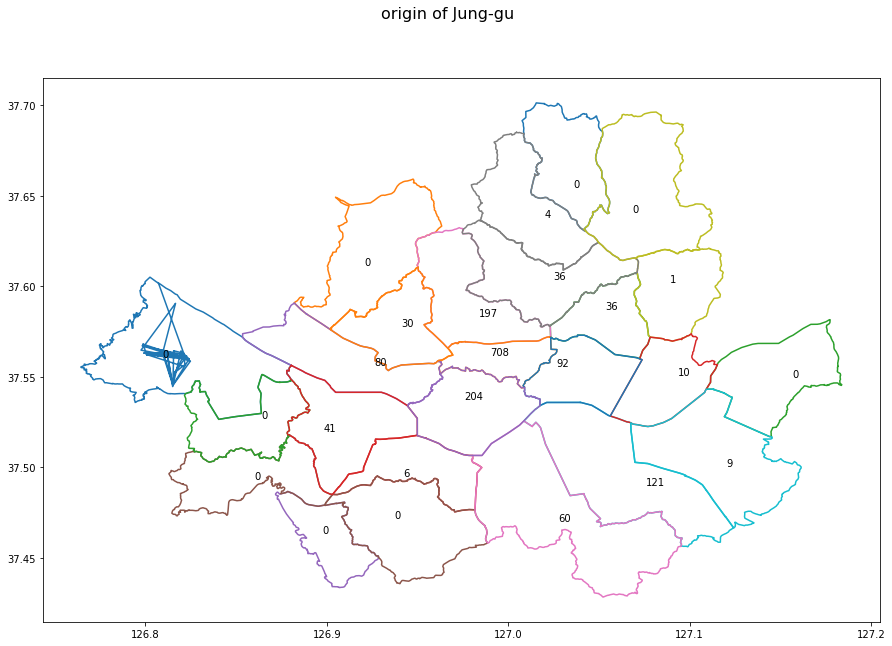

<Figure size 1080x720 with 0 Axes>

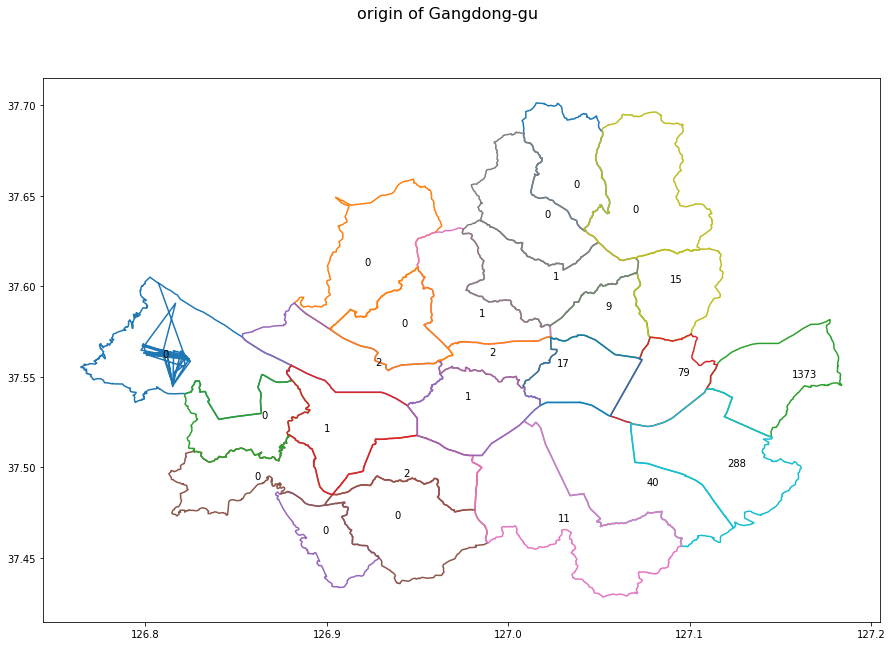

<Figure size 1080x720 with 0 Axes>

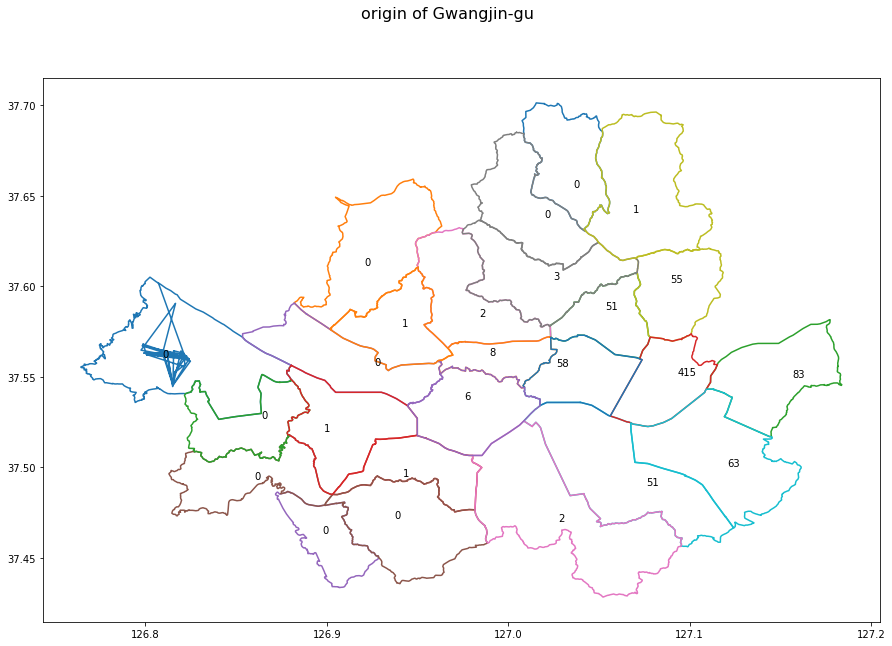

<Figure size 1080x720 with 0 Axes>

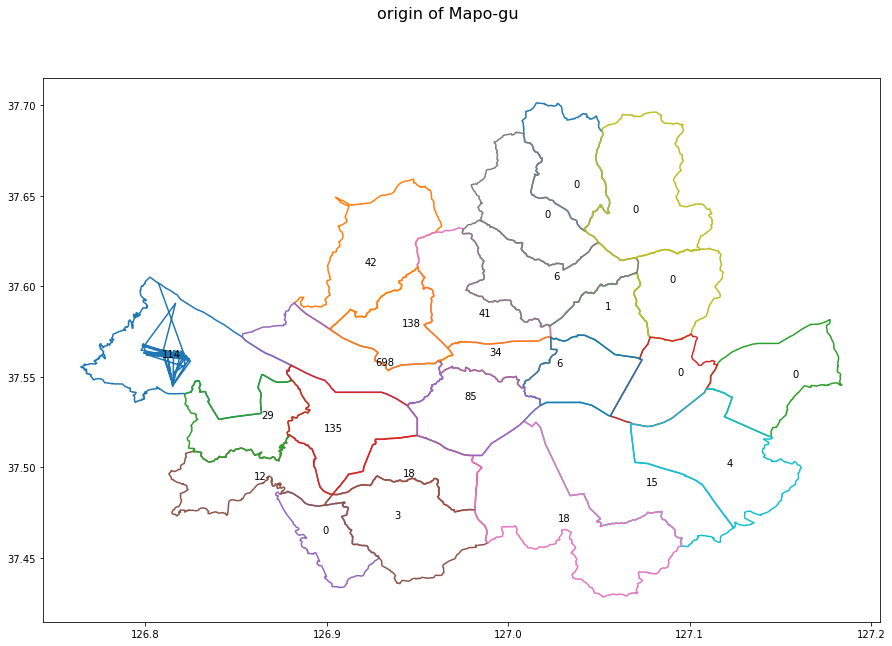

<Figure size 1080x720 with 0 Axes>

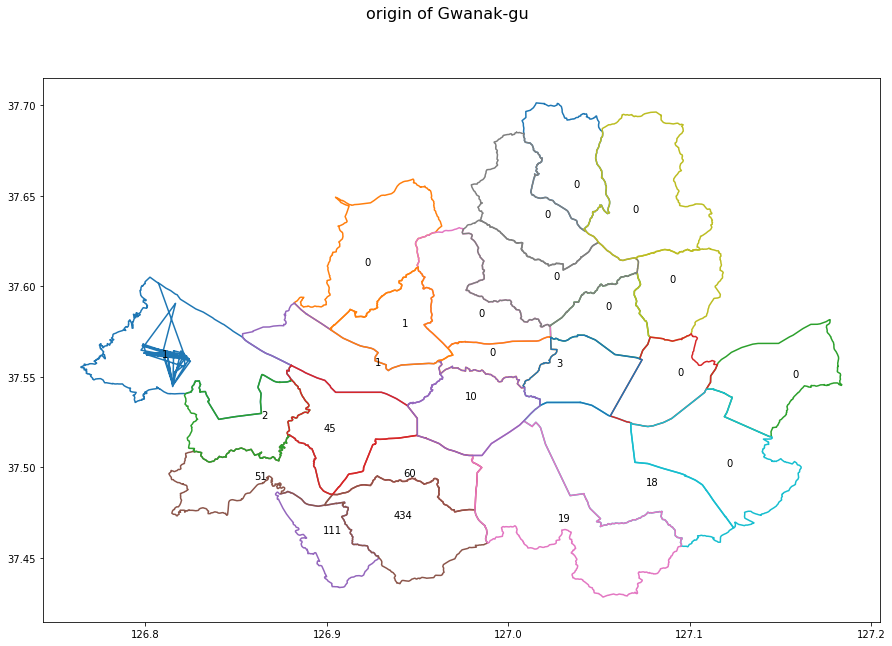

<Figure size 1080x720 with 0 Axes>

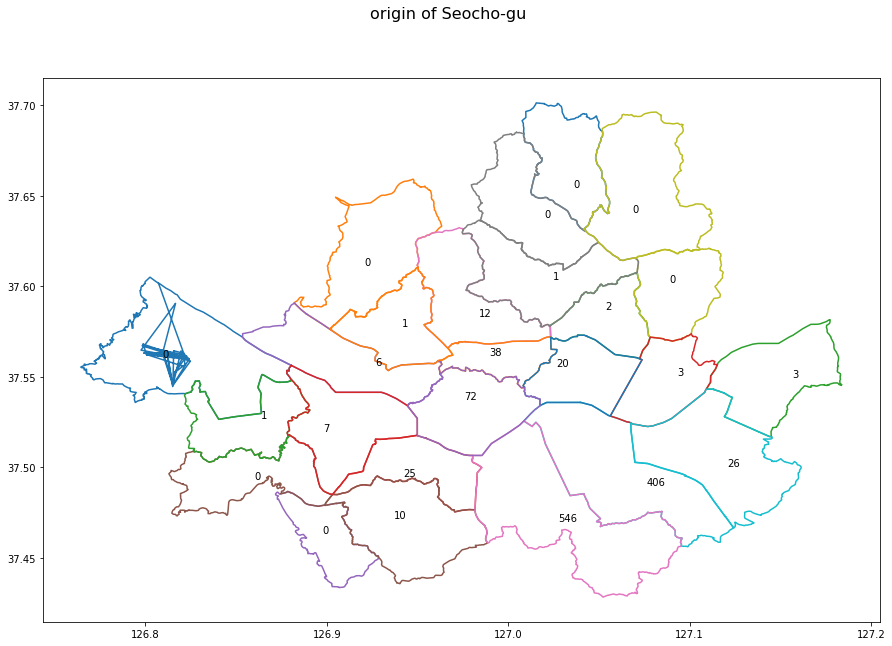

<Figure size 1080x720 with 0 Axes>

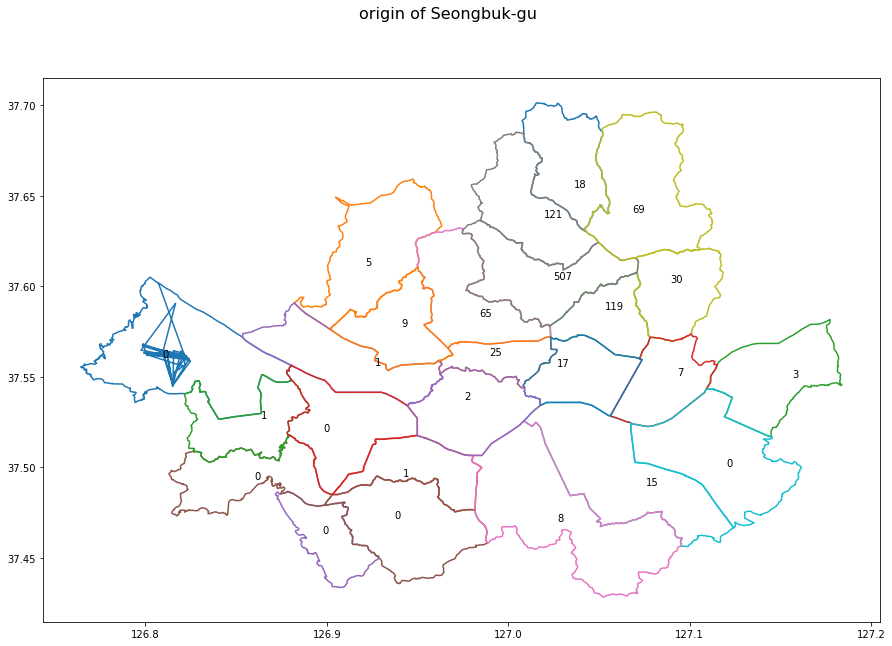

<Figure size 1080x720 with 0 Axes>

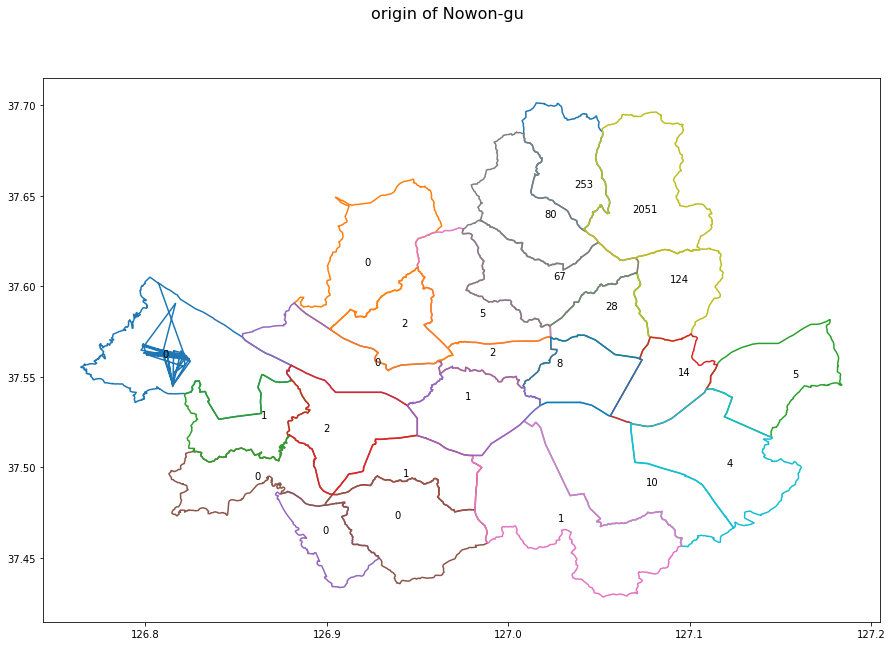

<Figure size 1080x720 with 0 Axes>

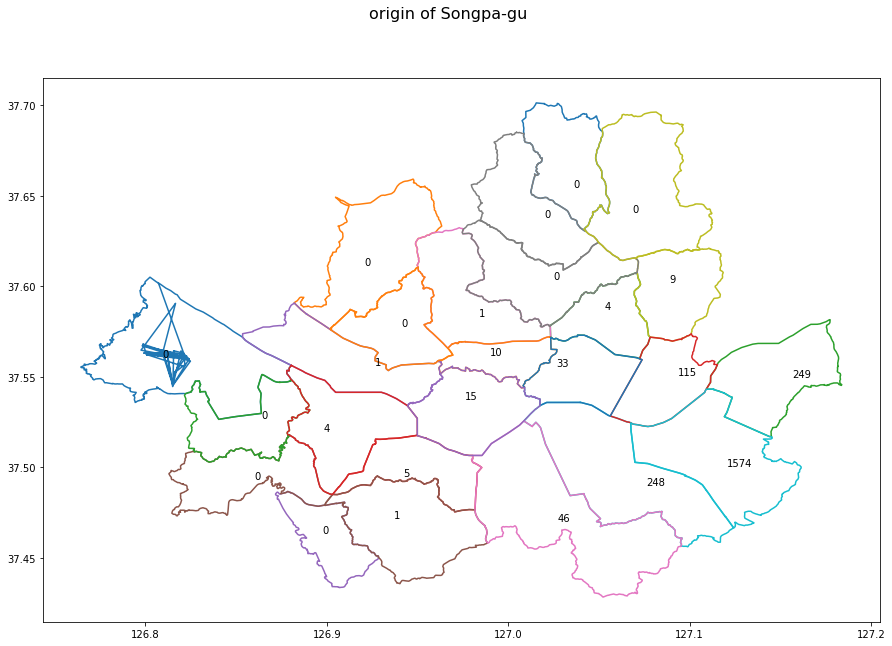

<Figure size 1080x720 with 0 Axes>

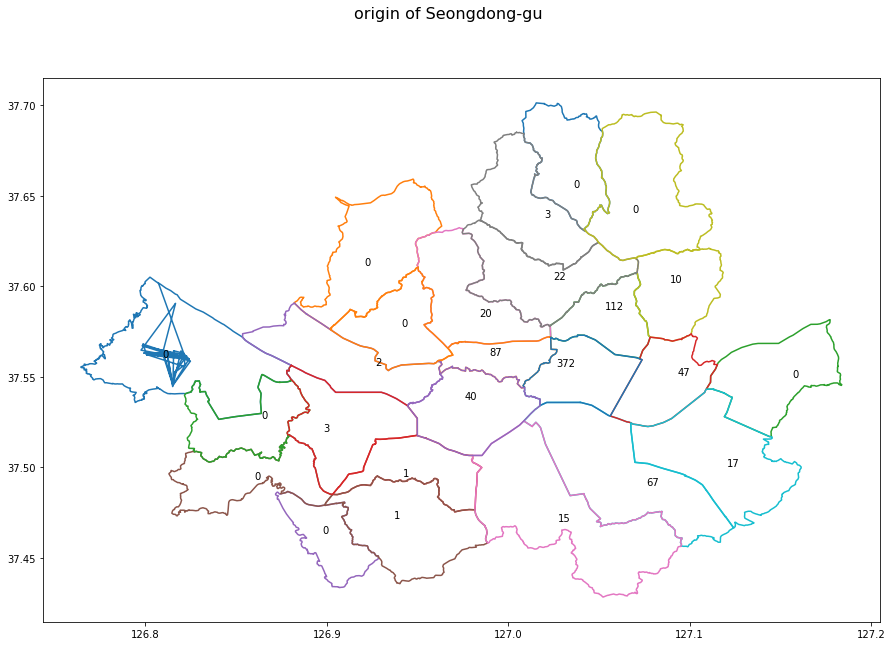

<Figure size 1080x720 with 0 Axes>

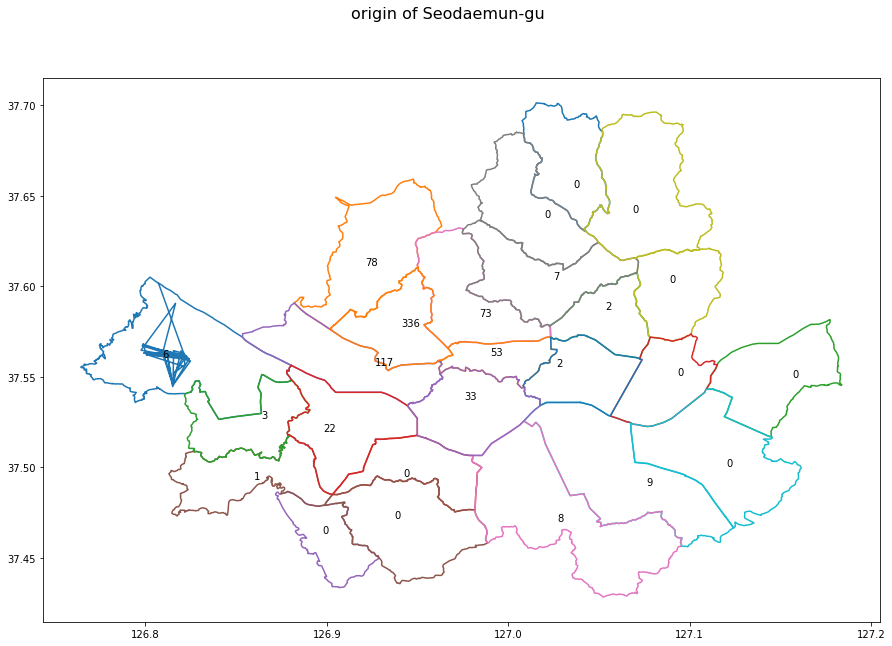

<Figure size 1080x720 with 0 Axes>

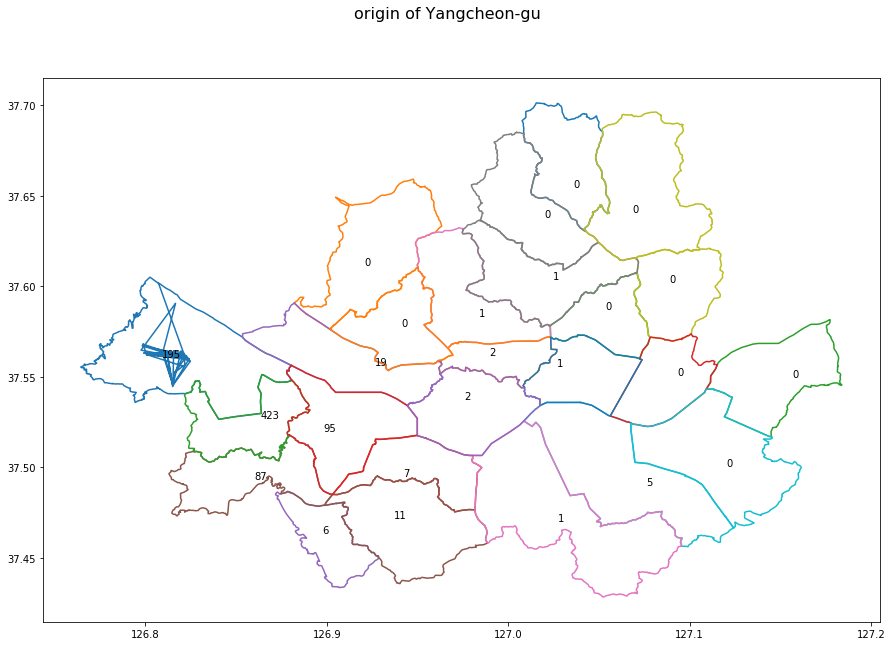

<Figure size 1080x720 with 0 Axes>

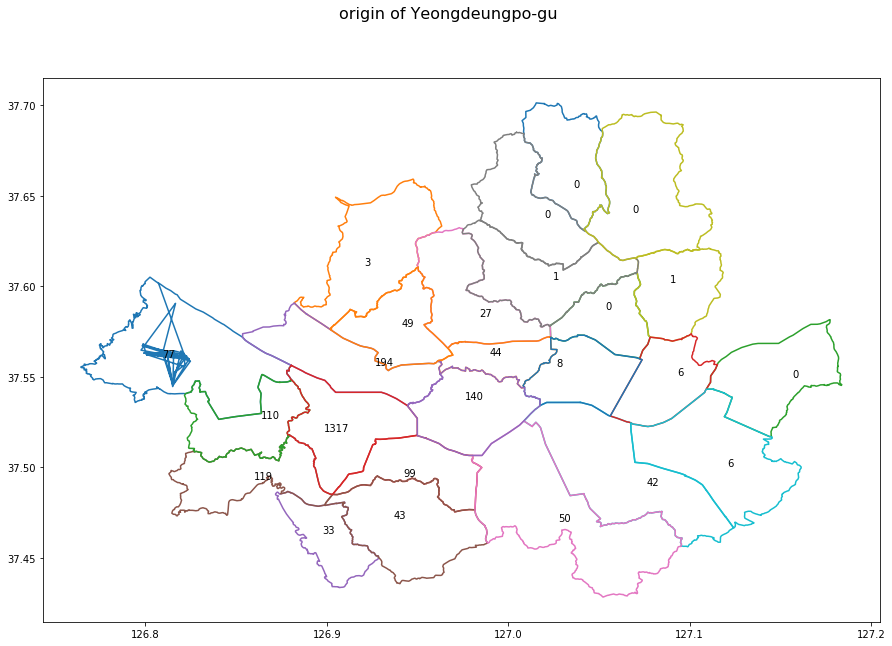

<Figure size 1080x720 with 0 Axes>

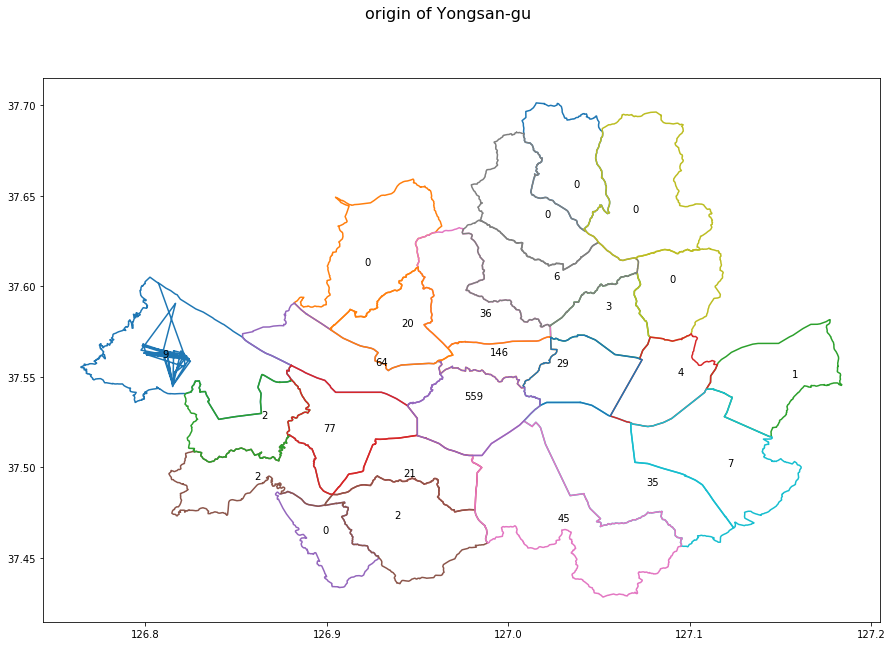

In [26]:
for k in range(25):
    seoul['count1']=0
    list=[]
    for i in range(35818):
        point = Point([b.iloc[i,2],b.iloc[i,3]])
        if seoul.iloc[k,6].contains(point):
            list.append([b.iloc[i,0],b.iloc[i,1]])
    c=pd.DataFrame(list)
    for i in range(len(c)):
        point = Point([c.iloc[i,0],c.iloc[i,1]])
        for j in range(25):
            if seoul.iloc[j,6].contains(point):
                seoul.iloc[j,9]+=1
    title = 'origin of '+seoul.iloc[k,2]
    plot_map(seoul,title, x_lim = None,y_lim = None,figsize = (15,10))